In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

off_train = pd.read_csv('data/offline_train.csv')
off_test = pd.read_csv('data/offline_test.csv')
on_train = pd.read_csv('data/online_train.csv')

In [2]:
print(off_train.columns)
print(off_test.columns)
print(on_train.columns)

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date'],
      dtype='object')
Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received'],
      dtype='object')
Index(['User_id', 'Merchant_id', 'Action', 'Coupon_id', 'Discount_rate',
       'Date_received', 'Date'],
      dtype='object')


In [3]:
off_train.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [4]:
on_train.head()

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [5]:
off_test.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [6]:
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Coupon_id      float64
 3   Discount_rate  object 
 4   Distance       float64
 5   Date_received  float64
 6   Date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [7]:
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Action         int64  
 3   Coupon_id      object 
 4   Discount_rate  object 
 5   Date_received  float64
 6   Date           float64
dtypes: float64(2), int64(3), object(2)
memory usage: 610.4+ MB


In [8]:
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   User_id        113640 non-null  int64  
 1   Merchant_id    113640 non-null  int64  
 2   Coupon_id      113640 non-null  int64  
 3   Discount_rate  113640 non-null  object 
 4   Distance       101576 non-null  float64
 5   Date_received  113640 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ MB


In [9]:
off_train.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date
count,1.754884e+06,1.754884e+06,1.053282e+06,1.648881e+06,1.053282e+06,7.769840e+05
mean,3.689255e+06,4.038808e+03,6.815398e+03,2.361636e+00,2.016032e+07,2.016040e+07
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483974e+00,1.771416e+02,1.621500e+02
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07
50%,3.694446e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07


In [10]:
on_train.describe()

,User_id,Merchant_id,Action,Date_received,Date
count,1.142983e+07,1.142983e+07,1.142983e+07,8.723570e+05,1.077393e+07
mean,1.074683e+07,3.436686e+04,2.348193e-01,2.016037e+07,2.016039e+07
std,4.137712e+06,1.441243e+04,5.426314e-01,1.560031e+02,1.732371e+02
min,4.000000e+00,1.000100e+04,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.019827e+07,2.090100e+04,0.000000e+00,2.016023e+07,2.016023e+07
50%,1.196970e+07,3.420000e+04,0.000000e+00,2.016040e+07,2.016041e+07
75%,1.373506e+07,4.741500e+04,0.000000e+00,2.016051e+07,2.016052e+07
max,1.550000e+07,6.000000e+04,2.000000e+00,2.016062e+07,2.016063e+07


In [11]:
off_test.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received
count,1.136400e+05,113640.000000,113640.000000,101576.000000,1.136400e+05
mean,3.684858e+06,2962.283853,9053.810929,2.328040,2.016072e+07
std,2.126259e+06,2494.450802,4145.873088,3.260755,9.019508e+00
min,2.090000e+02,6.000000,3.000000,0.000000,2.016070e+07
25%,1.844191e+06,760.000000,5023.000000,0.000000,2.016071e+07
50%,3.683266e+06,2050.000000,9983.000000,1.000000,2.016072e+07
75%,5.525845e+06,5138.000000,13602.000000,3.000000,2.016072e+07
max,7.361024e+06,8856.000000,14045.000000,10.000000,2.016073e+07


In [12]:
off_train.isnull().sum()

User_id               0
Merchant_id           0
Coupon_id        701602
Discount_rate    701602
Distance         106003
Date_received    701602
Date             977900
dtype: int64

In [13]:
on_train.isnull().sum()

User_id                 0
Merchant_id             0
Action                  0
Coupon_id        10557469
Discount_rate    10557469
Date_received    10557469
Date               655898
dtype: int64

In [14]:
off_test.isnull().sum()

User_id              0
Merchant_id          0
Coupon_id            0
Discount_rate        0
Distance         12064
Date_received        0
dtype: int64

In [15]:
print('offline train date_received')
print(off_train[off_train['Date_received'] != 'null']['Date_received'].min())
print(off_train[off_train['Date_received'] != 'null']['Date_received'].max())

print('online train date_received')
print(on_train[on_train['Date_received'] != 'null']['Date_received'].min())
print(on_train[on_train['Date_received'] != 'null']['Date_received'].max())

print('test data_received')
print(off_test['Date_received'].min())
print(off_test['Date_received'].max())

offline train date_received
20160101.0
20160615.0
online train date_received
20160101.0
20160615.0
test data_received
20160701
20160731


In [16]:
print('offline train date')
print(off_train[off_train['Date'] != 'null']['Date'].min())
print(off_train[off_train['Date'] != 'null']['Date'].max())

print('online train date')
print(on_train[on_train['Date'] != 'null']['Date'].min())
print(on_train[on_train['Date'] != 'null']['Date'].max())

offline train date
20160101.0
20160630.0
online train date
20160101.0
20160630.0


In [17]:
# 查看online 和 offline 训练集的 user_id 与测试集的重合度
off_train_user = off_train[['User_id']].copy().drop_duplicates() # drop_duplicates删除重复值
off_test_user = off_test[['User_id']].copy().drop_duplicates() # drop_duplicates删除重复值
on_train_user = on_train[['User_id']].copy().drop_duplicates() # drop_duplicates删除重复值
print('offline 训练集用户ID数')
print(off_train_user.User_id.count())
print('online 训练集用户ID数')
print(on_train_user.User_id.count())
print('offtest 训练集用户ID数')
print(off_test_user.User_id.count())

offline 训练集用户ID数
539438
online 训练集用户ID数
762858
offtest 训练集用户ID数
76309


In [18]:
off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user, on='User_id', how='left').reset_index().fillna(0)
print('offline 训练集和测试集用户的重复数据')
print(off_merge['off_train_flag'].sum())
print('offline 训练集和测试集用户的重复用户在测试集中占比')
print(off_merge['off_train_flag'].sum()/ off_merge['off_train_flag'].count())
on_train_user['on_train_flag'] = 1
on_merge = off_test_user.merge(on_train_user, on='User_id', how='left').reset_index().fillna(0)
print('online 训练集和测试集用户的重复数据')
print(on_merge['on_train_flag'].sum())
print('online 训练集和测试集用户的重复用户在测试集中占比')
print(on_merge['on_train_flag'].sum()/ on_merge['on_train_flag'].count())

offline 训练集和测试集用户的重复数据
76307.0
offline 训练集和测试集用户的重复用户在测试集中占比
0.9999737907717308
online 训练集和测试集用户的重复数据
43155.0
online 训练集和测试集用户的重复用户在测试集中占比
0.5655296229802513


In [22]:
off_train.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date'],
      dtype='object')

In [23]:
off_train['Discount_rate'].value_counts()

Discount_rate
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: count, dtype: int64

In [24]:
off_test['Discount_rate'].value_counts()

Discount_rate
30:5       59318
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
100:50        97
50:20         97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
0.5           10
300:20        10
200:100        3
500:30         1
0.85           1
0.6            1
0.7            1
Name: count, dtype: int64

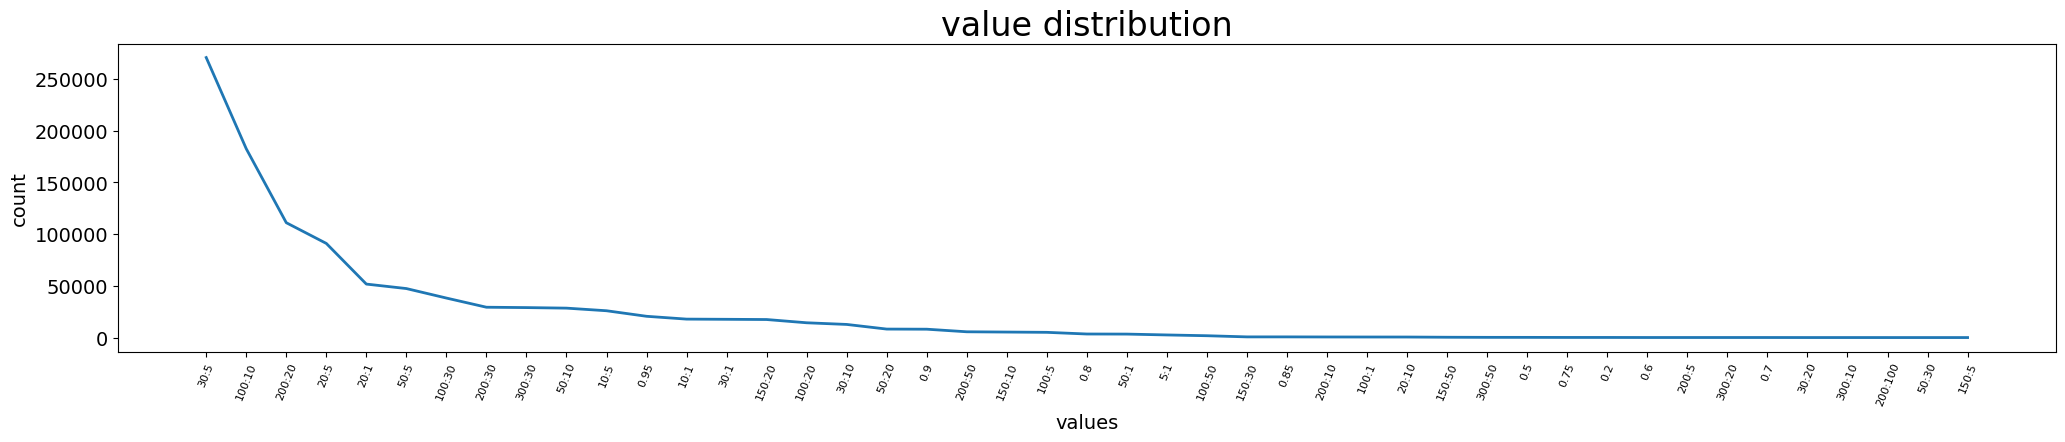

In [28]:
plt.rcParams['figure.figsize'] = (25.0, 4.0)
plt.title('value distribution', fontsize=24)
plt.xlabel('values', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.tick_params(axis='both', labelsize=14) # 设置坐标轴刻度标记
plt.xticks(size='small', rotation=68, fontsize=8) # 设置x轴标签
plt.plot(off_train['Discount_rate'].value_counts(), linewidth=2)
plt.show()

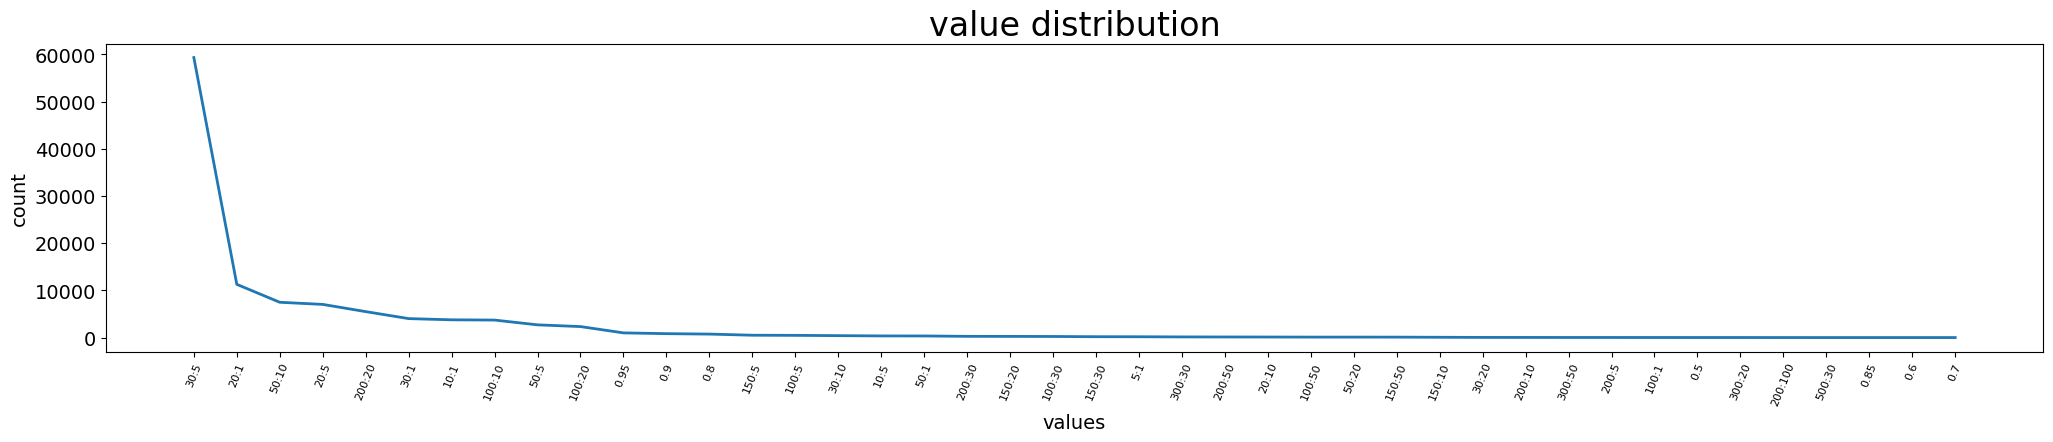

In [29]:
plt.rcParams['figure.figsize'] = (25.0, 4.0)
plt.title('value distribution', fontsize=24)
plt.xlabel('values', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.tick_params(axis='both', labelsize=14) # 设置坐标轴刻度标记
plt.xticks(size='small', rotation=68, fontsize=8) # 设置x轴标签
plt.plot(off_test['Discount_rate'].value_counts(), linewidth=2)
plt.show()

In [30]:
off_train['Distance'].value_counts()

Distance
0.0     826070
1.0     227221
10.0    206484
2.0     118413
3.0      76598
4.0      55085
5.0      41452
6.0      32483
7.0      25681
8.0      21436
9.0      17958
Name: count, dtype: int64

In [31]:
off_test['Distance'].value_counts()

Distance
0.0     43867
1.0     18474
10.0    10353
2.0      9523
3.0      5934
4.0      4006
5.0      2977
6.0      2179
7.0      1685
8.0      1359
9.0      1219
Name: count, dtype: int64

In [70]:
separator = ':'
# 计算折扣率将满减和折扣统一
# 当discount_rate 为null时一般都时没有优惠卷这时折扣应该时1
def get_discount_rate(s):
    s = str(s)
    if s == np.nan or s == 'nan':
        return -1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0 - float(s[1]) / float(s[0])

# 获取是否满减（full reduction promotion)
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return 0
    else:
        return 1

# 获取满减条件
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[0])

# 获取满减优惠
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])

# 获取月份
def get_month(s):
    if s[0] == np.nan or s[0] == 'nan':
        return -1
    else:
        return int(s[4:6])

# 获取日期
def get_month(s):
    if s[0] == np.nan:
        return -1
    else:
        return int(s[6:8])

# 获取日期间隔，输入内容为date，date_received
def get_day_gap(s):
    s = s.split(separator)
    if s[0] == np.nan or s[0] == 'nan':
        return -1
    if s[1] == np.nan or s[1] == 'nan':
        return -1
    else:
        return (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) - date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days

# 获取label,输入内容为date，date_received
def get_label(s):
    s = s.split(separator)
    if s[0] == np.nan or s[0] == 'nan':
        return 0
    if s[1] == np.nan or s[1] == 'nan':
        return -1
    if (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) - date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days <=15:
        return 1
    else:
        return -1

def add_feature(df):
    df['if_fd'] = df['Discount_rate'].apply(get_if_fd)
    df['full_value'] = df['Discount_rate'].apply(get_full_value)
    df['reduction_value'] = df['Discount_rate'].apply(get_reduction_value)
    df['discount_rate'] = df['Discount_rate'].apply(get_discount_rate)
    # df['distance'] = df['Distance'].replace([np.inf, -np.inf], 'null')
    df['distance'] = df['Distance'].fillna(-1).astype(int)
    # df['month_received'] = df['Date_received'].apply(get_month)
    # df['month'] = df['Date'].apply(get_month)
    return df

def add_label(df):
    df['day_gap'] = df['Date'].astype('str') + ':' + df['Date_received'].astype('str')
    df['label'] = df['day_gap'].apply(get_label)
    df['day_gap'] = df['day_gap'].apply(get_day_gap)
    return df

# 拷贝数据，以免调试时重复读取文件
dftrain = off_train.copy()
dftest = off_test.copy()

dftrain = add_feature(dftrain)
dftrain = add_label(dftrain)

dftest = add_feature(dftest)

dftrain.describe()
    

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date,if_fd,full_value,reduction_value,discount_rate,distance,day_gap,label
count,1.754884e+06,1.754884e+06,1.053282e+06,1.648881e+06,1.053282e+06,7.769840e+05,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,3.689255e+06,4.038808e+03,6.815398e+03,2.361636e+00,2.016032e+07,2.016040e+07,5.812407e-01,4.665974e+01,5.807668e+00,1.069696e-01,2.158577e+00,-6.212582e-01,-3.693657e-01
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483974e+00,1.771416e+02,1.621500e+02,4.933559e-01,6.830349e+01,9.037305e+00,9.061683e-01,3.470772e+00,2.414021e+00,5.534657e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
50%,3.694446e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07,1.000000e+00,2.000000e+01,5.000000e+00,7.500000e-01,0.000000e+00,-1.000000e+00,0.000000e+00
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07,1.000000e+00,1.000000e+02,1.000000e+01,9.000000e-01,3.000000e+00,-1.000000e+00,0.000000e+00
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07,1.000000e+00,3.000000e+02,1.000000e+02,9.900000e-01,1.000000e+01,9.600000e+01,1.000000e+00


In [72]:
dftest.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,if_fd,full_value,reduction_value,discount_rate,distance
count,1.136400e+05,113640.000000,113640.000000,101576.000000,1.136400e+05,113640.000000,113640.000000,113640.000000,113640.000000,113640.000000
mean,3.684858e+06,2962.283853,9053.810929,2.328040,2.016072e+07,0.977420,43.396507,6.089141,0.850671,1.974736
std,2.126259e+06,2494.450802,4145.873088,3.260755,9.019508e+00,0.148561,44.239815,5.640310,0.063551,3.248809
min,2.090000e+02,6.000000,3.000000,0.000000,2.016070e+07,0.000000,-1.000000,-1.000000,0.333333,-1.000000
25%,1.844191e+06,760.000000,5023.000000,0.000000,2.016071e+07,1.000000,30.000000,5.000000,0.833333,0.000000
50%,3.683266e+06,2050.000000,9983.000000,1.000000,2.016072e+07,1.000000,30.000000,5.000000,0.833333,1.000000
75%,5.525845e+06,5138.000000,13602.000000,3.000000,2.016072e+07,1.000000,30.000000,5.000000,0.900000,3.000000
max,7.361024e+06,8856.000000,14045.000000,10.000000,2.016073e+07,1.000000,500.000000,100.000000,0.990000,10.000000


In [74]:
print('offline 训练集满减情况')
dftrain.if_fd.value_counts() / dftrain.if_fd.count()

offline 训练集满减情况


if_fd
1    0.581241
0    0.418759
Name: count, dtype: float64

In [75]:
print('offline 测试集满减情况')
dftest.if_fd.value_counts() / dftest.if_fd.count()

offline 测试集满减情况


if_fd
1    0.97742
0    0.02258
Name: count, dtype: float64

<Axes: ylabel='distance'>

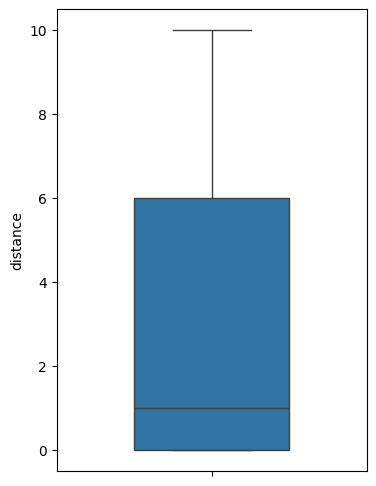

In [76]:
# 箱线图
fig = plt.figure(figsize=(4,6))
sns.boxplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], orient='v', width=0.5) 
# orient='v':指定箱线图的方向，'v' 代表垂直方向（竖直的箱线图），也可以指定为 'h'，代表水平箱线图。
# width=0.5:设置箱线图的宽度，值越小，箱体越窄。

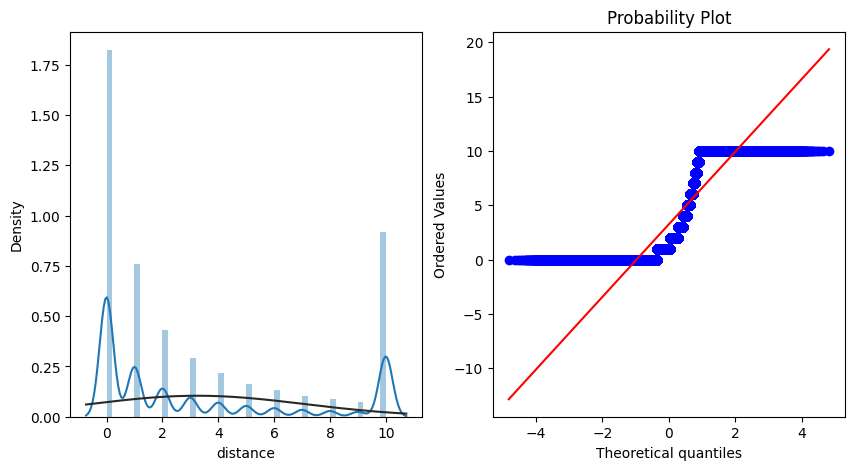

In [77]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], plot=plt)

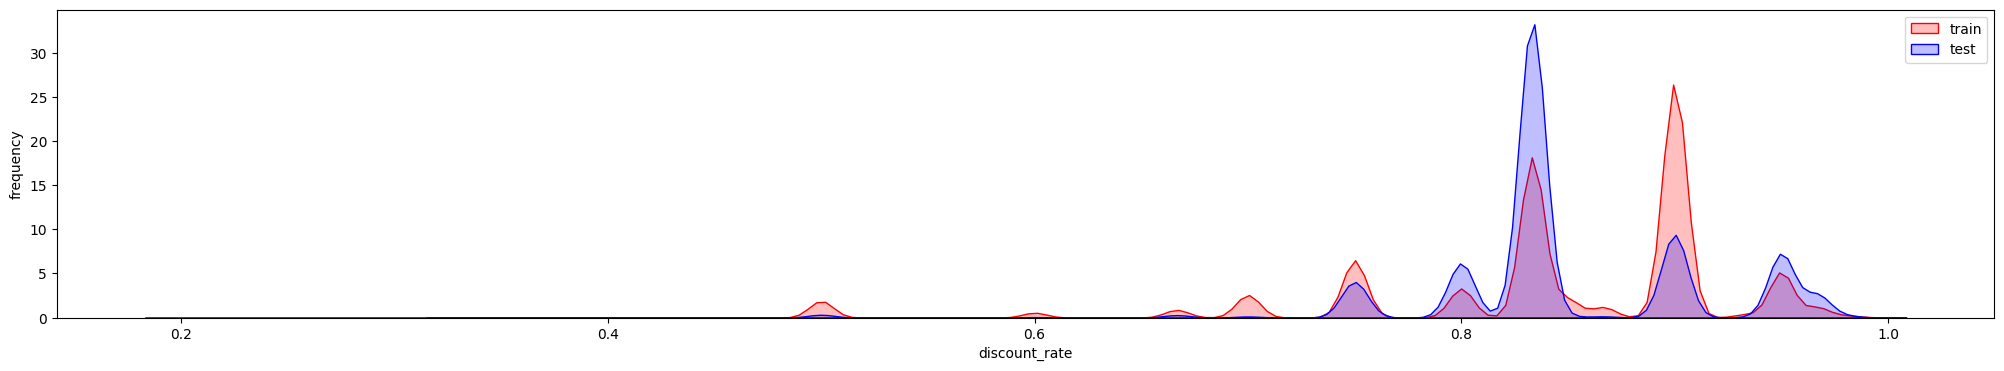

In [82]:
ax = sns.kdeplot(dftrain[(dftrain.label >= 0) & (dftrain.discount_rate >= 0)]['discount_rate'], color='Red', shade=True)
ax = sns.kdeplot(dftest[(dftest.discount_rate >= 0)]['discount_rate'], color='Blue', shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel('frequency')
ax = ax.legend(['train','test'])